#Advance Machine Learning Project

#Importing important Libraries, Read dataset and Analyzing

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [136]:
#Getting the shape
df.shape

(10000, 6)

In [137]:
#Getting the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [138]:
#Getting the Null values
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [139]:
#Getting the duplicates
df.duplicated().sum()

127

* Making a copy of the original data to prevent any inconvenience

In [177]:
df1 = df.copy()

#Initiate Data Cleaning process....

In [141]:
#dropping duplicates
df1.drop_duplicates(inplace=True)

#Exploratory_Data_Analysis on cleaned data

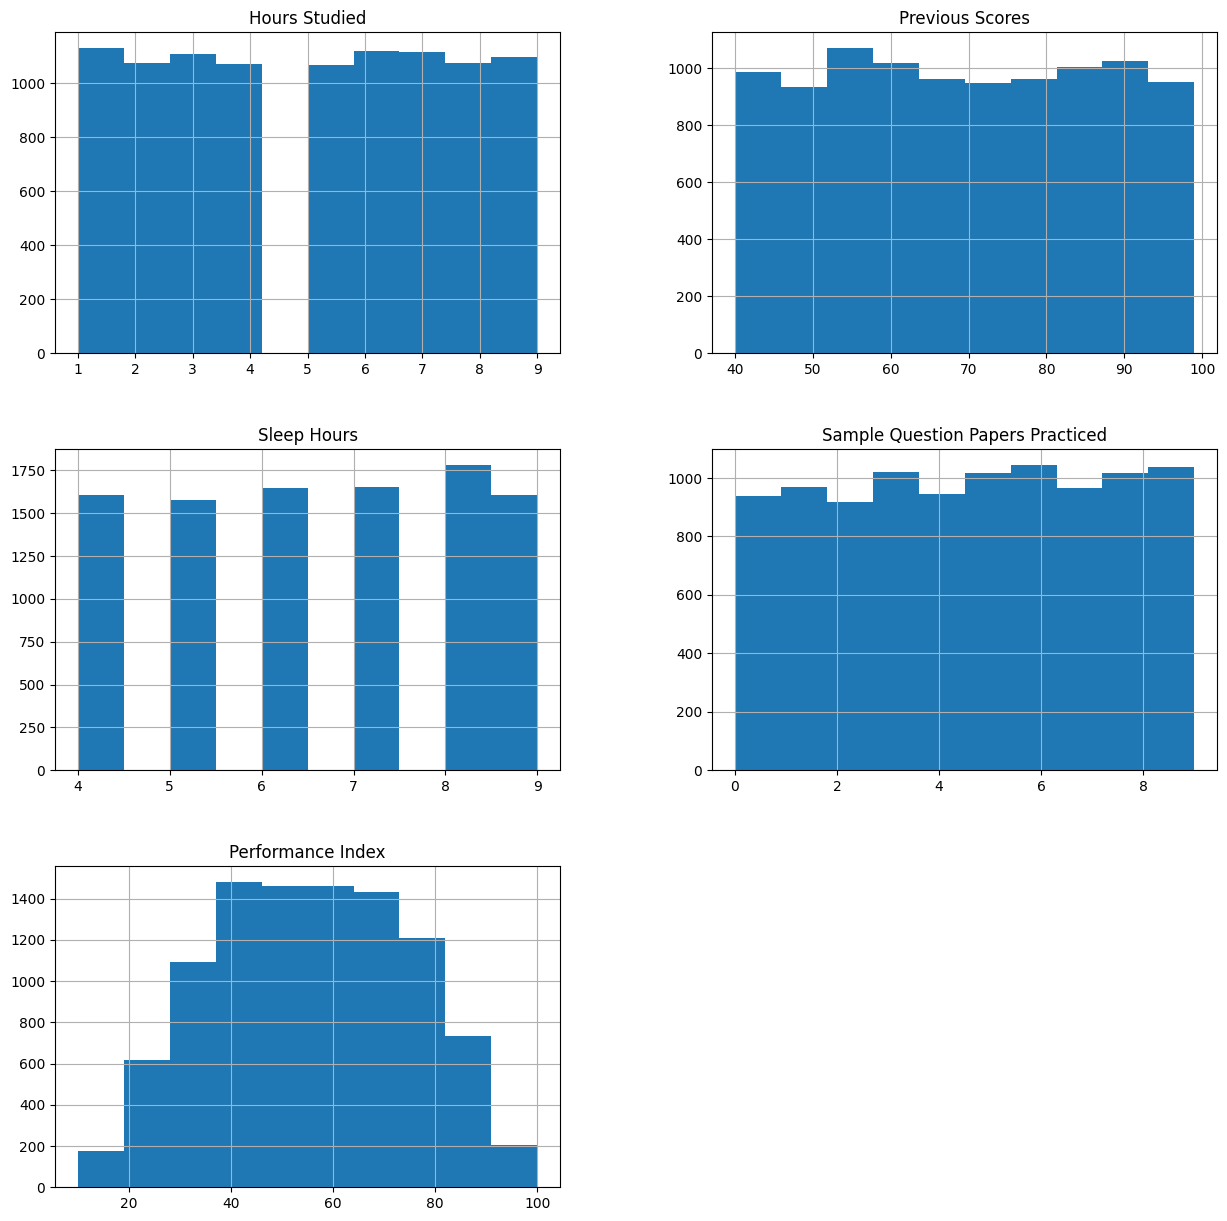

In [142]:
#check distribution using histogram plot
df1.hist(figsize=(15,15))
plt.show()

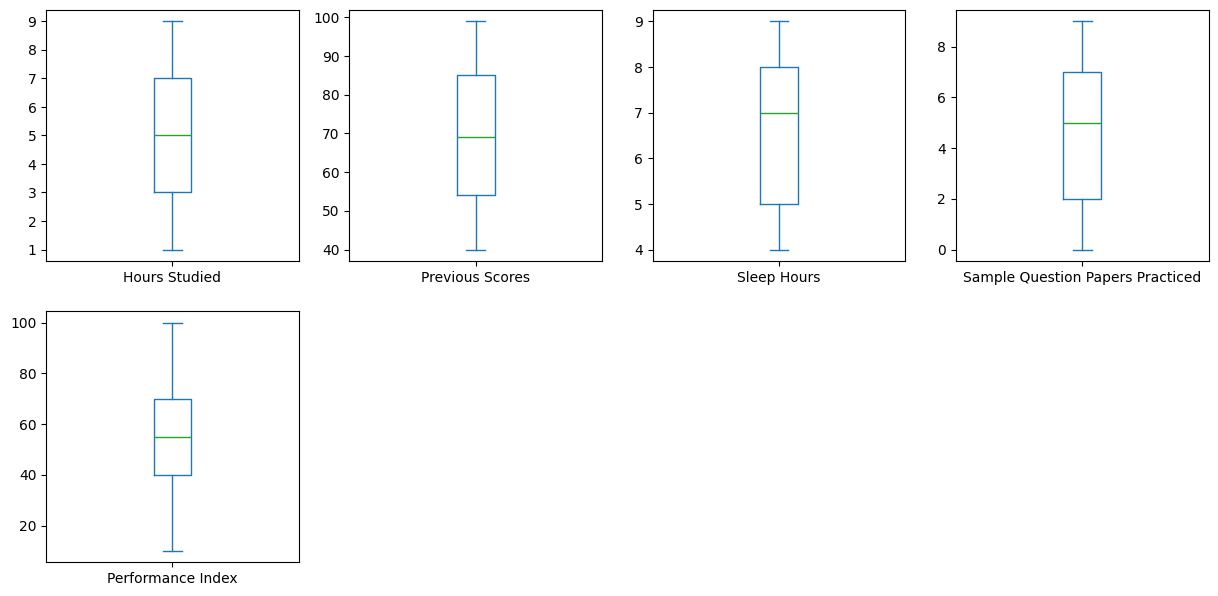

In [143]:
#check outliers using boxplot
df1.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,15))
plt.show()

In [144]:
#check the basic discription using EDA
df1.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


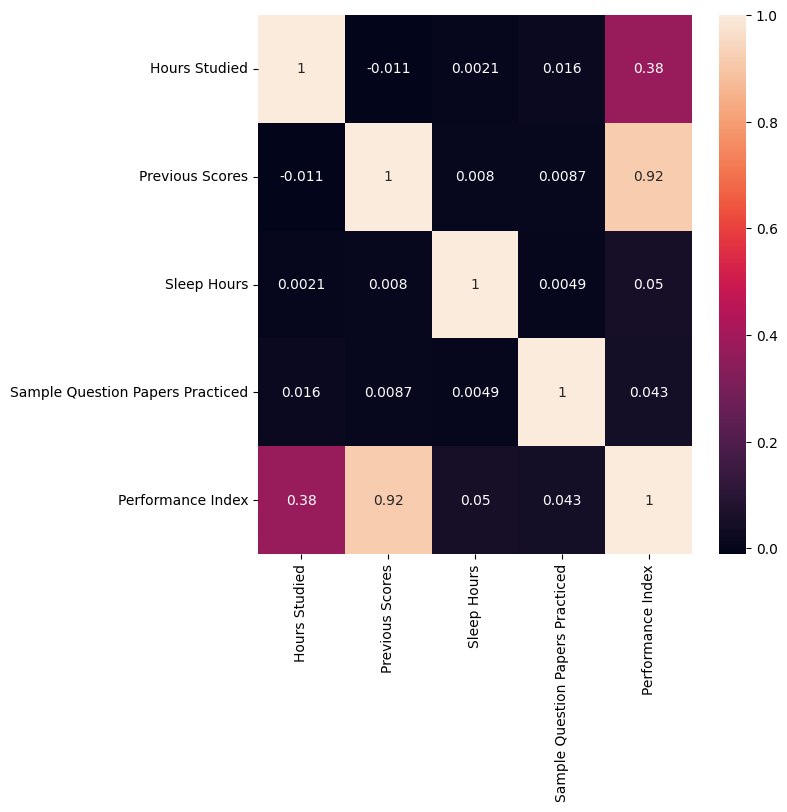

In [145]:
#check correlation using heatmap only on numerical columns
plt.figure(figsize=(7,7))
numerical_df = df1.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(),annot=True)
plt.show()

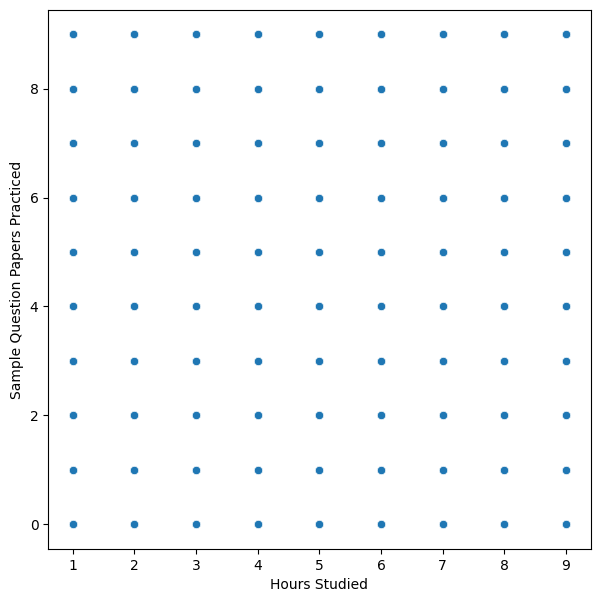

In [146]:
#check the correlation between 'Hours Studied' and 'Sample Question Papers Practiced' column

plt.figure(figsize=(7,7))
sns.scatterplot(x='Hours Studied',y='Sample Question Papers Practiced',data=df1)
plt.show()


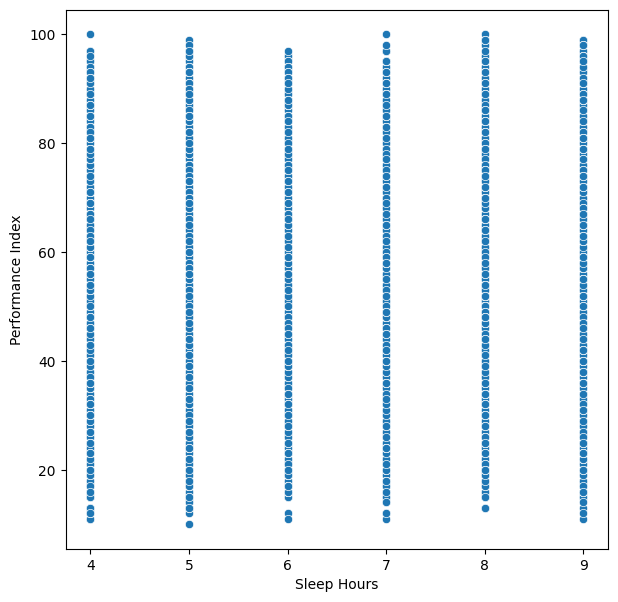

In [147]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='Sleep Hours', y='Performance Index', data=df1)
plt.show()

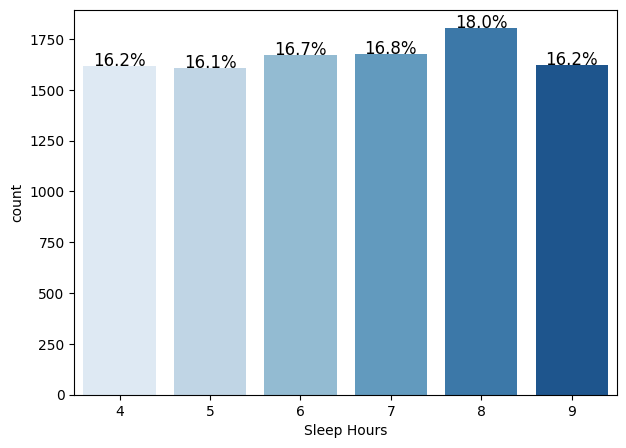

In [148]:
plt.figure(figsize=(7,5))
bar_plot = sns.countplot(x="Sleep Hours", data=df, palette="Blues")
total = len(df["Sleep Hours"])

for p in bar_plot.patches:
    bar_plot.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5,
                  f'{(p.get_height() / total) * 100:.1f}%', ha='center', fontsize=12)

plt.show()

#Model design

In [182]:
#Import necessary libraries
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Convert string column into numerical values
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'Extracurricular Activities' column in 'df'
# This is the crucial step to fix the error
df1['Extracurricular Activities'] = label_encoder.fit_transform(df1['Extracurricular Activities'])

# Now proceed with creating X and y
X = df1.drop(columns=['Performance Index'])
y = df['Performance Index']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(["Extracurricular Activities"] ,axis=1))
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))


# Combining scaled features with encoded 'Extracurricular Activities'
column= X[["Extracurricular Activities"]]
X_combined = np.hstack((X_scaled, column.values))

##Applying linear regression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_scaled, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R² Score: 0.9889832909573145
Mean Squared Error: 0.011061471626806856
Mean Absolute Error (MAE): 0.08386191600510545
Root Mean Squared Error (RMSE): 0.10517353101806012


In [186]:
#SVM
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # SVM classifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 3: Preprocess the data (optional: scaling, encoding, handling missing values, etc.)
# Assuming all columns except 'target' are features
X = df1.drop('Performance Index', axis=1)  # Features
y = df1['Performance Index']  # Target labels

# Step 4: Train/Test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build the SVM model
svm_model = SVC(kernel='linear')  # You can try other kernels like 'rbf', 'poly', etc.

# Step 6: Train the SVM model
svm_model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = svm_model.predict(X_test)

# Step 8: Evaluate the model
print(confusion_matrix(y_test, y_pred))

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


[[0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Mean Squared Error: 0.011061471626806856
R-squared: 0.9870326686298971


In [187]:
# Random  forest
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



# Step 2: Define your features (X) and target (y)
# Assume 'target_column' is the column you want to predict, and the rest are features
X = df1.drop('Performance Index', axis=1)  # Features
y = df1['Performance Index']  # Target labels


# Step 3: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators is the number of trees

# Step 5: Train the model
rf.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = rf.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 8: Print the evaluation results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-Squared: {r2}')



Mean Squared Error (MSE): 5.158838006796808
R-Squared: 0.9860792088401176


##Summary

###We have made the model and compared linear regression, logistic regression, and SVM and in all of these Linear regression perform best with **R2** 98%(approx.) and **MSE** 0.011
####***Linear regression ***
R² Score: 0.9889832909573145
Mean Squared Error: 0.011061471626806856
Mean Absolute Error (MAE): 0.08386191600510545
Root Mean Squared Error (RMSE): 0.10517353101806012

####***Logostic regression ***
Mean Squared Error: 0.011061471626806856
R-squared: 0.9870326686298971

####***SVM***
Mean Squared Error (MSE): 5.158838006796808
R-Squared: 0.9860792088401176